In [6]:
import pandas as pd
import altair as alt

alt.themes.enable('opaque')

ThemeRegistry.enable('opaque')

In [141]:
df = pd.read_csv('data/taxes-by-county.csv')
df.head()

,County #,County,year,total_taxes,residential_taxes,per_capita_taxes,per_capita_residential_taxes,res_per_income,fips,res_percent,index_res_taxes_per_income
0,18,Beaverhead,2002,7.991143e+06,3.512553e+06,886.132476,389.504703,0.017072,30001,0.439556,100.000000
1,18,Beaverhead,2003,7.937825e+06,3.547598e+06,889.491834,397.534541,0.016347,30001,0.446923,95.749588
2,18,Beaverhead,2004,8.405847e+06,3.779371e+06,943.628935,424.267076,0.016468,30001,0.449612,96.459892
3,18,Beaverhead,2005,8.631169e+06,3.824307e+06,969.358630,429.504347,0.015878,30001,0.443081,93.005859
4,18,Beaverhead,2006,8.974881e+06,4.029238e+06,995.881139,447.096995,0.016658,30001,0.448946,97.569628


In [182]:
montana = df.groupby('year')[['total_taxes','residential_taxes']].sum().reset_index()
montana['res_percent'] = montana['residential_taxes'] / montana['total_taxes']

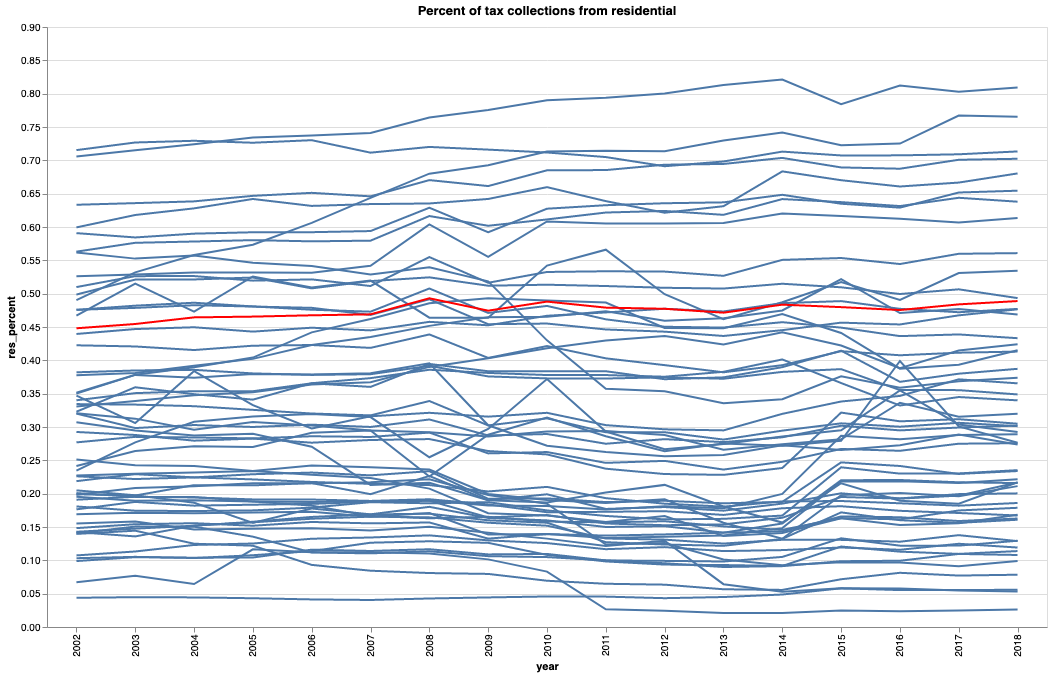

In [187]:
y_scale = alt.Scale(domain=[0, 0.03])

data = df
# data = df[df['County'].isin(['Missoula'])]

counties = alt.Chart(data).mark_line().encode(
    x='year:O',
    y=alt.Y('res_percent'),
    detail='County',
    tooltip=['County'],
).properties(
    width=1000,
    height=600,
    title='Percent of tax collections from residential'
)

mt = alt.Chart(montana).mark_line(
    color='red',
    width=2
).encode(
    x='year:O',
    y=alt.Y('res_percent'),
    tooltip=['res_percent'],
)

counties + mt

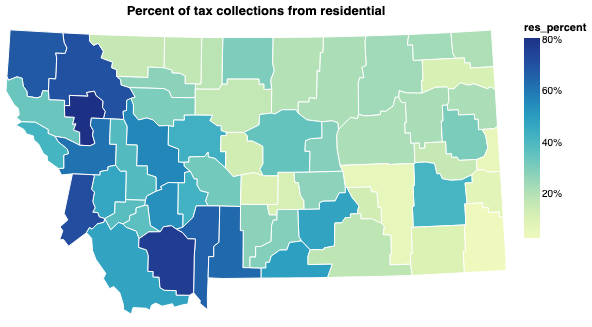

In [169]:
# Adapted from: https://altair-viz.github.io/gallery/choropleth.html
mt_counties_topojson_url = 'https://gist.githubusercontent.com/eidietrich/30118ba41ea41681948b06b0cf75864f/raw/9f8a2ed6d61d8ad7c42207ab4ef55a1e6548a909/mt-10m-counties.json'
county_lines = alt.topo_feature(mt_counties_topojson_url, 'counties')

# filter data
data = df[df['year'] == 2018]
# data = data[data['County'] != 'Madison']

background = alt.Chart(county_lines).mark_geoshape(
    fill='lightgray',
    stroke='white'
).encode(
    color='res_percent:Q',
    tooltip=['res_percent:Q']
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(data, 'fips', ['res_percent'])
).project(
    type='albers',
    rotate=[110,0]
).properties(
    width=500,
    height=300,
    title='Percent of tax collections from residential'
)

(background).configure(numberFormat='.0%').configure_view(strokeOpacity=0)

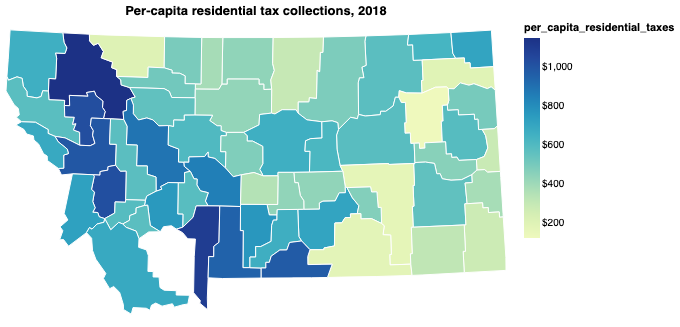

In [158]:
# filter data
year = 2018
data = df[df['year'] == year]
data = data[data['County'] != 'Madison']

background = alt.Chart(county_lines).mark_geoshape(
    fill='lightgray',
    stroke='white'
).encode(
    color='per_capita_residential_taxes:Q',
    tooltip=['per_capita_residential_taxes:Q'],
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(data, 'fips', ['per_capita_residential_taxes'])
).project(
    type='albers',
    rotate=[110,0]
).properties(
    width=500,
    height=300,
    title=f'Per-capita residential tax collections, {year}',
)

(background).configure(numberFormat='$,.0f').configure_view(strokeOpacity=0)

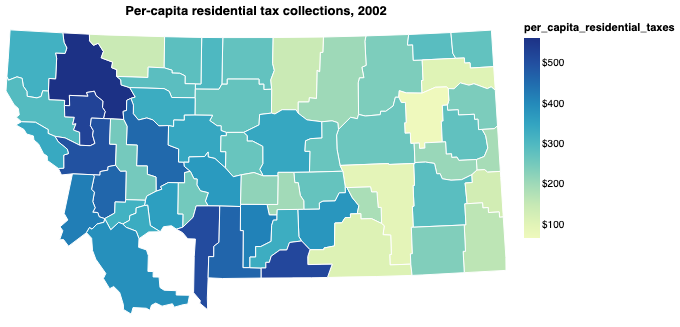

In [100]:
# filter data
year = 2002
data = df[df['year'] == year]
data = data[data['County'] != 'Madison']

background = alt.Chart(county_lines).mark_geoshape(
    fill='lightgray',
    stroke='white'
).encode(
    color='per_capita_residential_taxes:Q',
    tooltip=['per_capita_residential_taxes:Q'],
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(data, 'fips', ['per_capita_residential_taxes','year'])
).project(
    type='albers',
    rotate=[110,0]
).properties(
    width=500,
    height=300,
    title=f'Per-capita residential tax collections, {year}',
)

(background).configure(numberFormat='$,.0f').configure_view(strokeOpacity=0)

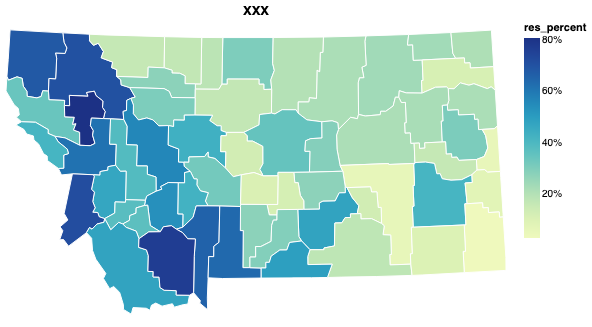

In [152]:
# Adapted from: https://altair-viz.github.io/gallery/choropleth.html
mt_counties_topojson_url = 'https://gist.githubusercontent.com/eidietrich/30118ba41ea41681948b06b0cf75864f/raw/9f8a2ed6d61d8ad7c42207ab4ef55a1e6548a909/mt-10m-counties.json'
county_lines = alt.topo_feature(mt_counties_topojson_url, 'counties')

# filter data
data = df
# data = df[df['year'] == 2018]
# data = data[data['County'] != 'Madison']

background = alt.Chart(county_lines).mark_geoshape(
    fill='lightgray',
    stroke='white'
).encode(
    color='res_percent:Q',
    tooltip=['res_percent:Q']
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(data, 'fips', ['res_percent'])
).project(
    type='albers',
    rotate=[110,0]
).properties(
    width=500,
    height=300,
    title='XXX'
)

(background).configure(numberFormat='.0%').configure_view(strokeOpacity=0)